In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_table('sim_ts.txt', delimiter = '\t', decimal = '.')
df

,vlr,date,produto
0,1.006195e+09,2009-12-01,alimenticio
1,9.986980e+08,2010-01-01,alimenticio
2,9.994182e+08,2010-02-01,alimenticio
3,9.900000e+08,2010-03-01,alimenticio
4,9.942075e+08,2010-04-01,alimenticio
...,...,...,...
506,2.530390e+07,2021-06-01,saude
507,2.665517e+07,2021-07-01,saude
508,2.623714e+07,2021-08-01,saude
509,2.800000e+07,2021-09-01,saude


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   vlr      511 non-null    float64
 1   date     511 non-null    object 
 2   produto  511 non-null    object 
dtypes: float64(1), object(2)
memory usage: 12.1+ KB


In [22]:
df.date = pd.to_datetime(df.date, format = '%Y-%m-%d',)


0     2009-12-01
1     2010-01-01
2     2010-02-01
3     2010-03-01
4     2010-04-01
         ...    
506   2021-06-01
507   2021-07-01
508   2021-08-01
509   2021-09-01
510   2021-10-01
Name: date, Length: 511, dtype: datetime64[ns]

In [27]:
df.produto.value_counts()

alimenticio             143
auxilio_final_de_ano    138
bonificacao              88
transporte               82
saude                    60
Name: produto, dtype: int64

In [33]:
df.groupby(by = ['produto'],as_index = False).agg({'date':['min','max']})

produto        date            
                                min         max
0           alimenticio  2009-12-01  2021-10-01
1  auxilio_final_de_ano  2009-12-01  2021-05-01
2           bonificacao  2012-01-01  2021-10-01
3                 saude  2016-11-01  2021-10-01
4            transporte  2015-01-01  2021-10-01

In [35]:
df.isna().sum(axis = 0)

vlr        0
date       0
produto    0
dtype: int64

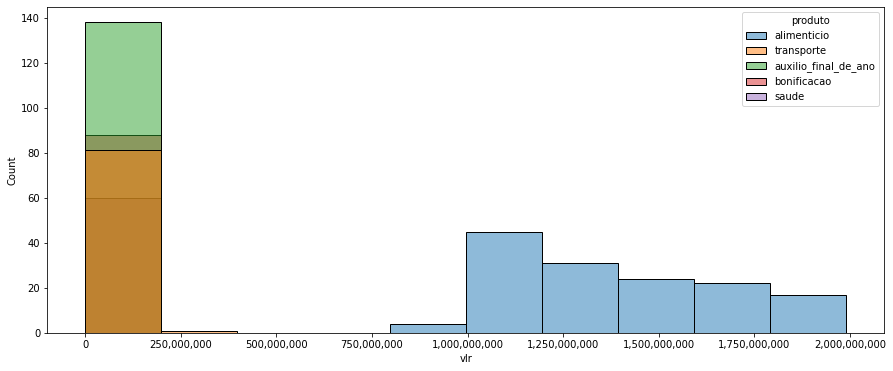

In [64]:
fig = plt.figure(figsize = (15,6))
sns.histplot(data = df, x = 'vlr', hue = 'produto')
valores_em_x = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in valores_em_x])
plt.show()

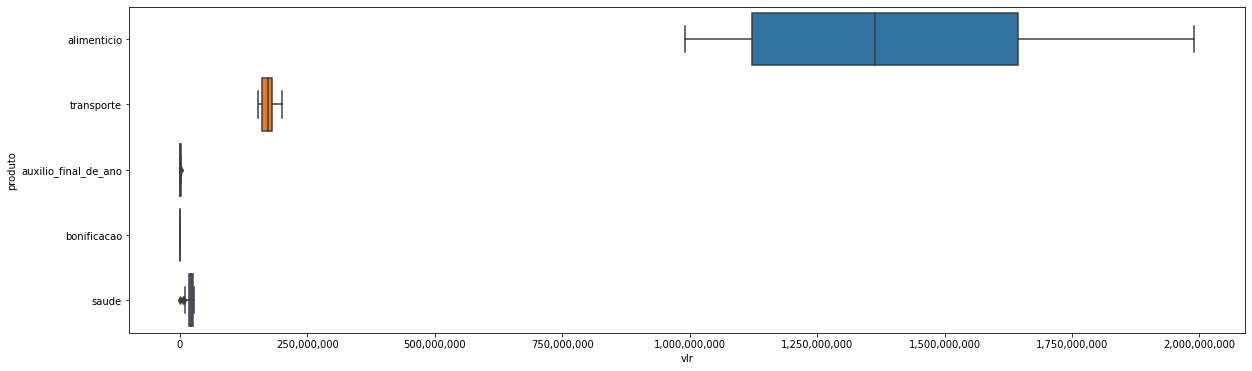

In [70]:
fig = plt.figure(figsize = (20,6))
sns.boxplot(data = df, x = 'vlr', y = 'produto')
valores_em_x = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in valores_em_x])
plt.show()

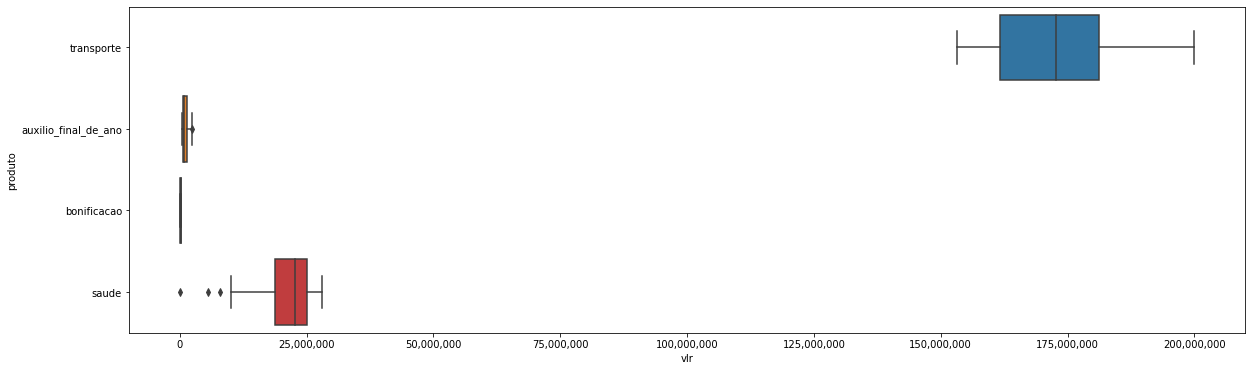

In [71]:
fig = plt.figure(figsize = (20,6))
sns.boxplot(data = df[df['produto']!= 'alimenticio'], x = 'vlr', y = 'produto')
valores_em_x = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in valores_em_x])
plt.show()

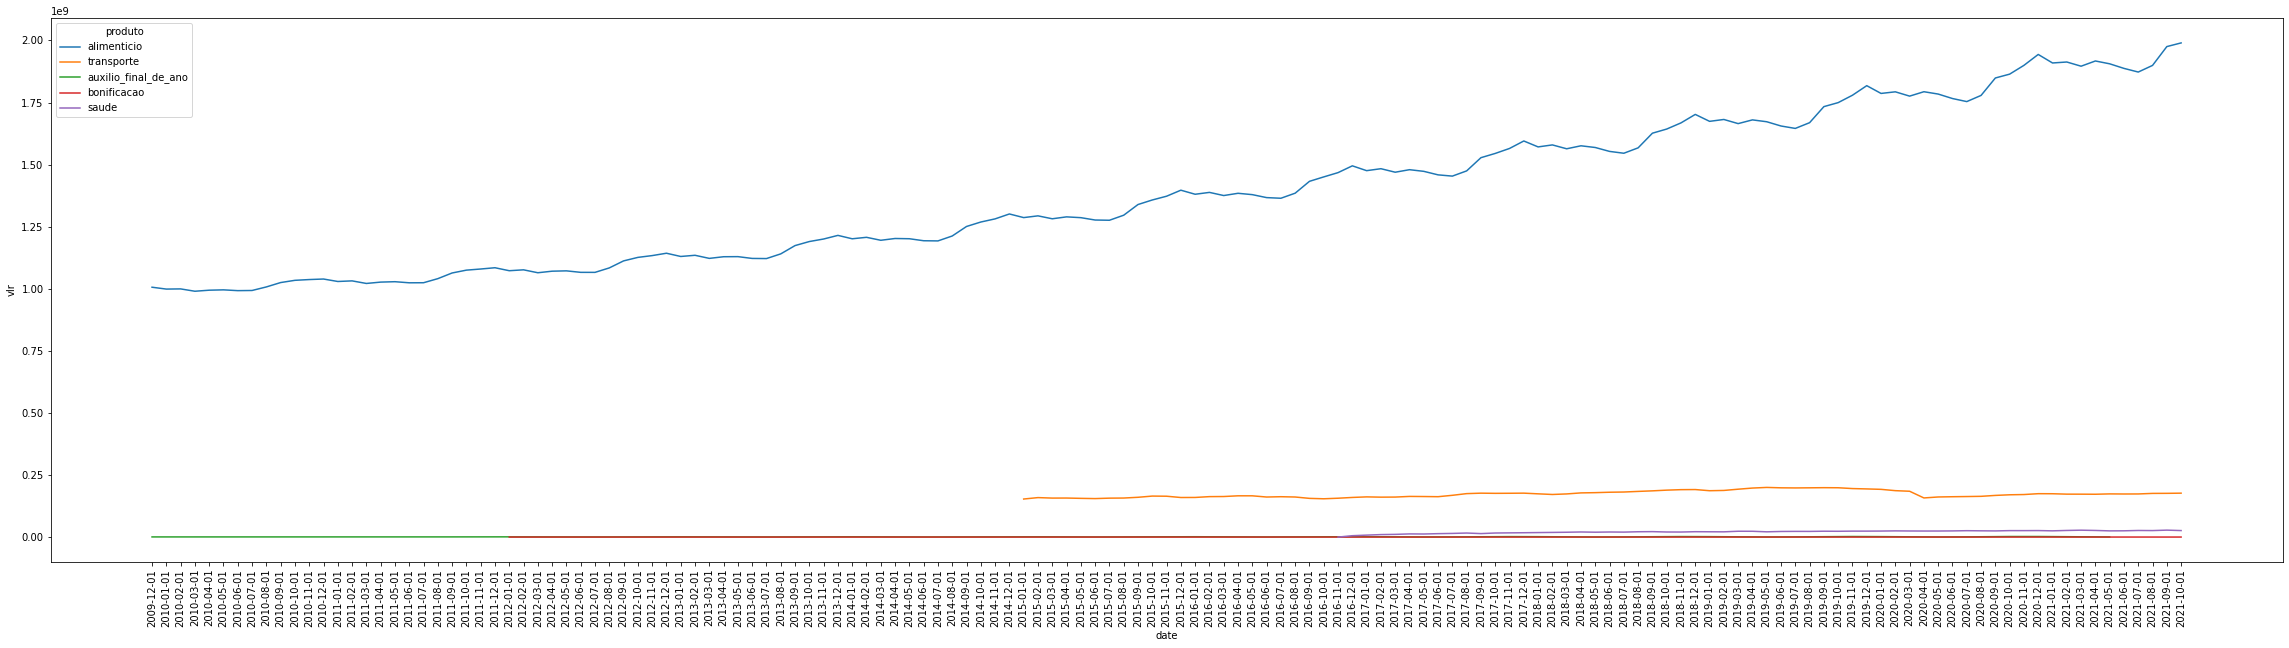

In [88]:
fig = plt.figure(figsize = (40,10))
sns.lineplot(data = df, x = 'date', y = 'vlr', hue = 'produto')
plt.xticks(rotation = 90, )
plt.show()

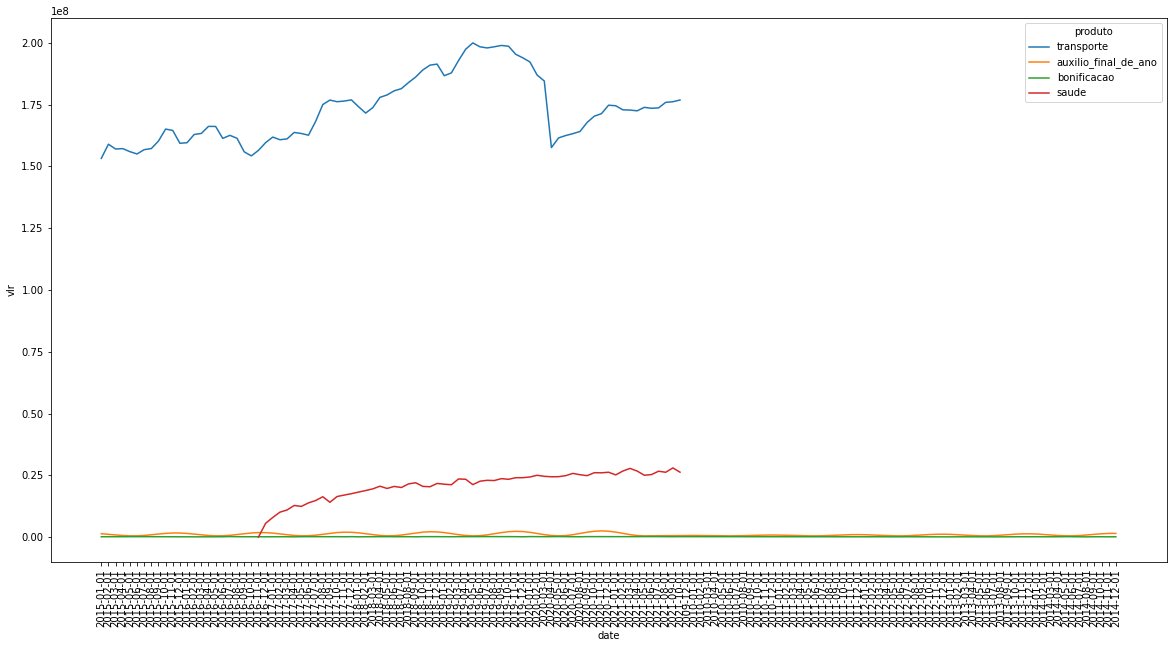

In [93]:
fig = plt.figure(figsize = (20,10))
sns.lineplot(data = df[~df['produto'].isin(['alimenticio'])], x = 'date', y = 'vlr', hue = 'produto')
plt.xticks(rotation = 90, )
plt.show()

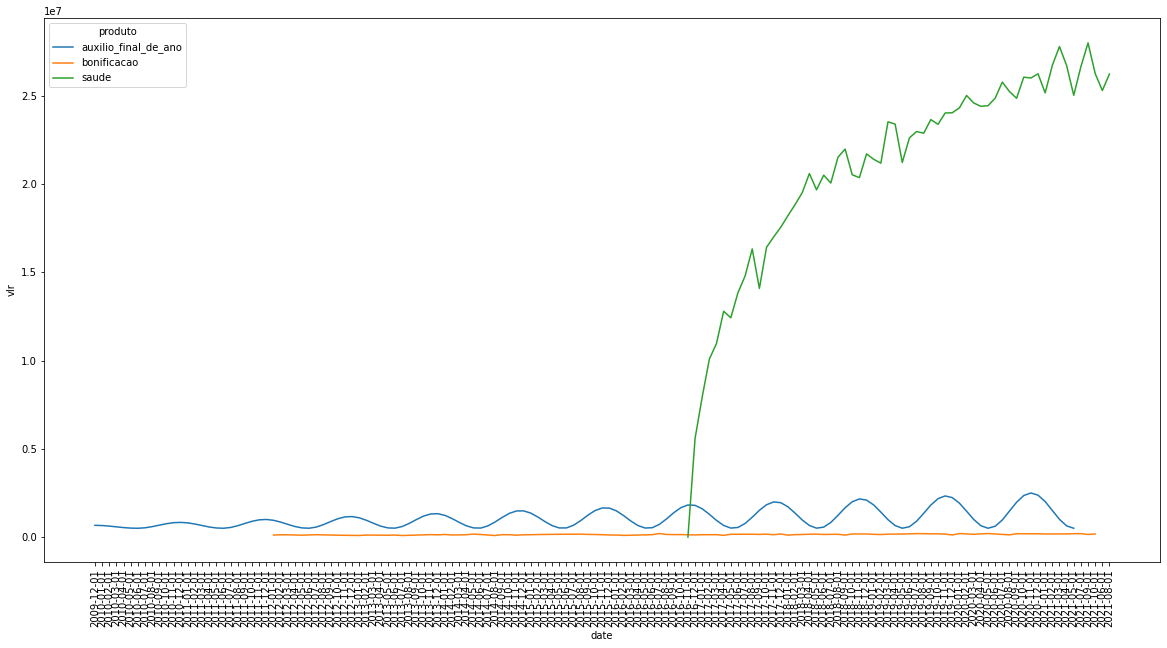

In [92]:
fig = plt.figure(figsize = (20,10))
sns.lineplot(data = df[~df['produto'].isin(['alimenticio','transporte'])], x = 'date', y = 'vlr', hue = 'produto')
plt.xticks(rotation = 90, )
plt.show()

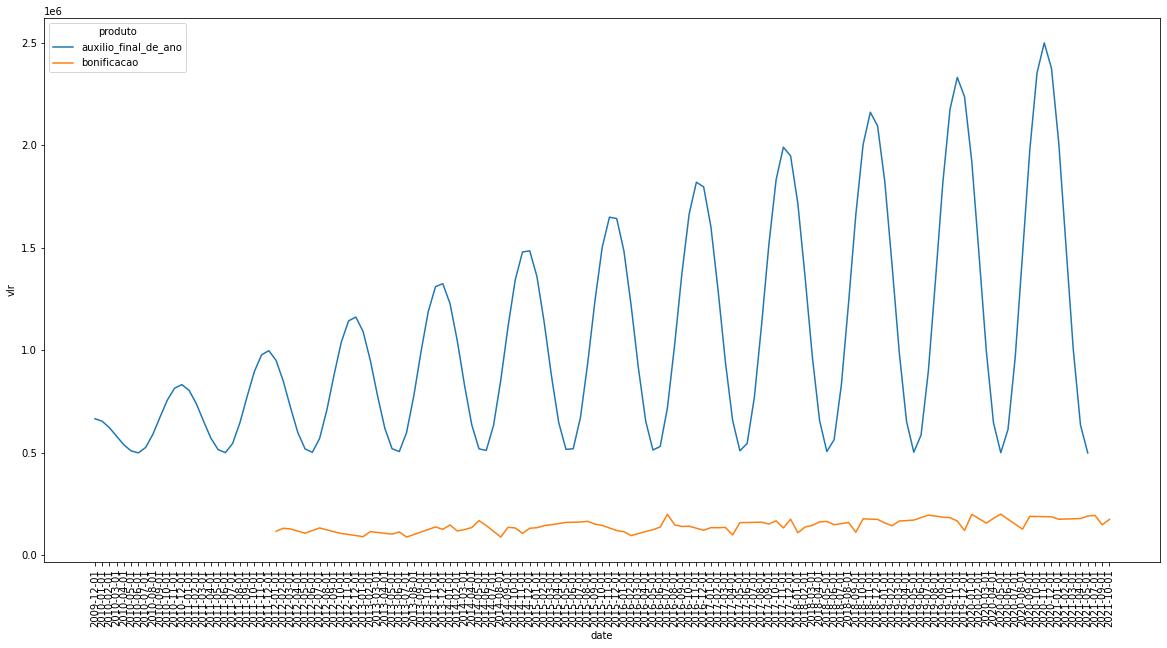

In [94]:
fig = plt.figure(figsize = (20,10))
sns.lineplot(data = df[~df['produto'].isin(['alimenticio','transporte', 'saude'])], x = 'date', y = 'vlr', hue = 'produto')
plt.xticks(rotation = 90, )
plt.show()

In [100]:
data_min = df.groupby(by = ['produto'],as_index = False).agg({'date':['min','max']})['date']['min'].max()
data_max = df.groupby(by = ['produto'],as_index = False).agg({'date':['min','max']})['date']['max'].min()

In [103]:
filtro_datas_sobrepostas = (df.date >= data_min) & (df.date <= data_max)
df_sobreposto = df[filtro_datas_sobrepostas]

df_sobreposto

,vlr,date,produto
83,1.467659e+09,2016-11-01,alimenticio
84,1.494981e+09,2016-12-01,alimenticio
85,1.475569e+09,2017-01-01,alimenticio
86,1.483431e+09,2017-02-01,alimenticio
87,1.469303e+09,2017-03-01,alimenticio
...,...,...,...
501,2.516770e+07,2021-01-01,saude
502,2.672496e+07,2021-02-01,saude
503,2.779497e+07,2021-03-01,saude
504,2.672081e+07,2021-04-01,saude


In [108]:
df_pivot = pd.pivot_table(data = df_sobreposto, index = 'date', columns= 'produto', values = 'vlr', aggfunc= 'sum')
df_pivot

produto,alimenticio,auxilio_final_de_ano,bonificacao,saude,transporte
date,,,,,
2016-11-01,1.467659e+09,1.820504e+06,NaN,0.000000e+00,1.565260e+08
2016-12-01,1.494981e+09,1.797618e+06,122682.385930,5.594537e+06,1.596412e+08
2017-01-01,1.475569e+09,1.603374e+06,135207.453368,7.946243e+06,1.618911e+08
2017-02-01,1.483431e+09,1.290532e+06,134848.285205,1.008665e+07,1.608174e+08
2017-03-01,1.469303e+09,9.440673e+05,136384.810294,1.097331e+07,1.611503e+08
2017-04-01,1.479458e+09,6.580876e+05,99852.662814,1.279503e+07,1.637679e+08
2017-05-01,1.472814e+09,5.102712e+05,159681.866796,1.242508e+07,1.633310e+08
2017-06-01,1.458652e+09,5.458643e+05,NaN,1.384395e+07,1.626508e+08
2017-07-01,1.453614e+09,7.714571e+05,NaN,1.479411e+07,1.682426e+08


In [109]:
df_pivot.corr()

produto,alimenticio,auxilio_final_de_ano,bonificacao,saude,transporte
produto,,,,,
alimenticio,1.000000,0.271927,0.562840,0.840866,0.191451
auxilio_final_de_ano,0.271927,1.000000,-0.039927,0.050988,0.186768
bonificacao,0.562840,-0.039927,1.000000,0.568271,0.288075
saude,0.840866,0.050988,0.568271,1.000000,0.428446
transporte,0.191451,0.186768,0.288075,0.428446,1.000000
